# Chapter13.Statistics 

1. ''Normality Tests(正規性検定)"
     
    
2. ''Portfolio Optimization(ポートフォリオ最適化)"

    
3. ''Bayesian Statistics(ベイズ統計)"
    
    
4. ''Machine Learning(機械学習)"

## 1.Normality Tests

・Portfolio theory (ポートフォリオ理論)

・Capital asset pricing model (CAPM)

・Efficient markets hypotsis (効率市場仮説)

・Option pricing theory (オプション価格理論)

→次節の範囲

### Benchmark Case

#### Natural log returns
\$log\left(\dfrac{S_t}{S_s}\right)= log(S_t) - log(S_s) ~~~(0<s<t)\$\par
　
 は正規分布に従う(つまりリターンは対数正規分布に従う)
    
#### Log-normal values
全ての\$t > 0\$ において、\$S_t\$ が対数正規分布に従っている場合を考える　<br>
scipy.stats:統計に関連する関数などが含まれるモジュール <br>
statsmodels.api:回帰分析などの統計的分析をするモジュール

In [1]:
#scipy.stats と statsmodels.api のインポート
import math
import numpy as np
import scipy.stats as scs
import statsmodels.api as sm
from pylab import mpl,plt

In [2]:
#フォントの調整
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [3]:
def gen_paths(S0, r, sigma, T, M, I):
            ''' 幾何ブラウン運動のモンテカルロ法のパスを生成する

            パラメーター
            ==========
            S0: float
                0時点での株価価値
            r: float
                短期利子率
            sigma: float
                ボラティリティー
            T: float
                満期までの時間の長さ
            M: int
                満期までの期間数
            I: int
                シュミレーションするpathの数

            Returns
            =======
            paths: (M+1)行 I 列のndarray
            '''
            dt = T / M
            paths = np.zeros((M + 1, I))
            paths[0] = S0
            for t in range(1, M + 1):
                rand = np.random.standard_normal(I)
                rand = (rand - rand.mean()) / rand.std()  
                paths[t] = paths[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt +
                                                 sigma * math.sqrt(dt) * rand)  
            return paths 


・\$[S_0, S_1, ....S_M]\$ が I 行作られる

In [4]:
S0 = 100.
r = 0.05
sigma = 0.2
T = 1.0
M = 50
I = 250000
np.random.seed(1000)

In [5]:
paths = gen_paths(S0,r,sigma,T,M,I)

In [6]:
S0 * math.exp(r * T)

105.12710963760242

In [7]:
paths[-1].mean()

105.12645392478755

・\$S_0 \mathrm{e}^{rT}\ = E[ S_T ] $

$\\lim_{k\to\infty}{\mathrm{\left(1+\dfrac{r}{k}\right)}^{kT}} = \mathrm{e}^{rT}\$

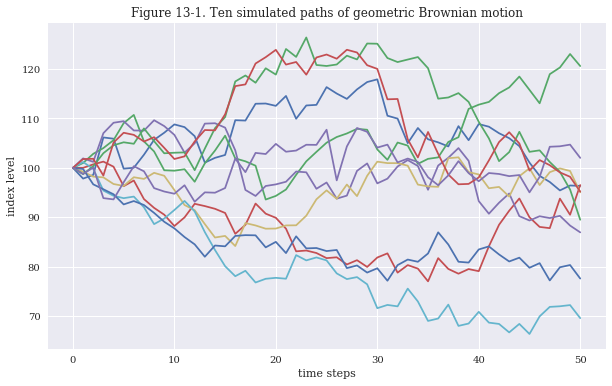

In [8]:
plt.figure(figsize=(10,6))
plt.plot(paths[:,:10])
plt.title('Figure 13-1. Ten simulated paths of geometric Brownian motion')
plt.xlabel('time steps')
plt.ylabel('index level');

In [9]:
paths[:,0].round(4)

array([100.    ,  97.821 ,  98.5573, 106.1546, 105.899 ,  99.8363,
       100.0145, 102.6589, 105.6643, 107.1107, 108.7943, 108.2449,
       106.4105, 101.0575, 102.0197, 102.6052, 109.6419, 109.5725,
       112.9766, 113.0225, 112.5476, 114.5585, 109.942 , 112.6271,
       112.7502, 116.3453, 115.0443, 113.9586, 115.8831, 117.3705,
       117.9185, 110.5539, 109.9687, 104.9957, 108.0679, 105.7822,
       105.1585, 104.3304, 108.4387, 105.5963, 108.866 , 108.3284,
       107.0077, 106.0034, 104.3964, 101.0637,  98.3776,  97.135 ,
        95.4254,  96.4271,  96.3386])

In [10]:
log_returns = np.log(paths[1:] / paths[:-1])

In [11]:
log_returns[:,0].round(4)

array([-0.022 ,  0.0075,  0.0743, -0.0024, -0.059 ,  0.0018,  0.0261,
        0.0289,  0.0136,  0.0156, -0.0051, -0.0171, -0.0516,  0.0095,
        0.0057,  0.0663, -0.0006,  0.0306,  0.0004, -0.0042,  0.0177,
       -0.0411,  0.0241,  0.0011,  0.0314, -0.0112, -0.0095,  0.0167,
        0.0128,  0.0047, -0.0645, -0.0053, -0.0463,  0.0288, -0.0214,
       -0.0059, -0.0079,  0.0386, -0.0266,  0.0305, -0.0049, -0.0123,
       -0.0094, -0.0153, -0.0324, -0.0269, -0.0127, -0.0178,  0.0104,
       -0.0009])

教科書，In[12]無し

In [12]:
def print_statistics(array):
    ''' Prints selected statistics.
       Parameters
       ==========
       array: ndarray
               object to generate statistics on
             '''
    sta = scs.describe(array)
    print('%14s %15s' % ('統計量', '値'))
    print(30 * '-')
    print('%14s %15.5f' % ('要素数', sta[0]))
    print('%14s %15.5f' % ('最小値', sta[1][0]))
    print('%14s %15.5f' % ('最大値', sta[1][1]))
    print('%14s %15.5f' % ('平均', sta[2]))
    print('%14s %15.5f' % ('標準偏差', np.sqrt(sta[3])))
    print('%14s %15.5f' % ('歪度', sta[4]))
    print('%14s %15.5f' % ('尖度', sta[5]))

In [13]:
print_statistics(log_returns.flatten())

           統計量               値
------------------------------
           要素数  12500000.00000
           最小値        -0.15664
           最大値         0.15371
            平均         0.00060
          標準偏差         0.02828
            歪度         0.00055
            尖度         0.00085


In [14]:
log_returns.mean() * M + 0.5 * sigma ** 2

0.05000000000000005

In [15]:
log_returns.std() * math.sqrt(M)

0.20000000000000015

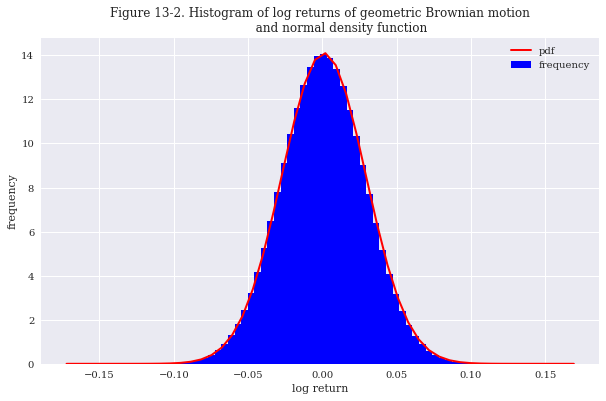

In [16]:
plt.figure(figsize=(10,6))
plt.hist(log_returns.flatten(),bins = 70,
         density = True, label = 'frequency',color = 'b')
plt.title('Figure 13-2. Histogram of log returns of geometric Brownian motion\n\
           and normal density function')
plt.xlabel('log return')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0],plt.axis()[1])
plt.plot(x,scs.norm.pdf(x, loc = r / M, scale = sigma / np.sqrt(M)),
         'r' , lw = 2.0, label = 'pdf')
plt.legend();
#教科書のnormedは近い将来廃止される。densityで代用可能。

QQプロットについて  
https://ja.wikipedia.org/wiki/Q-Qプロット

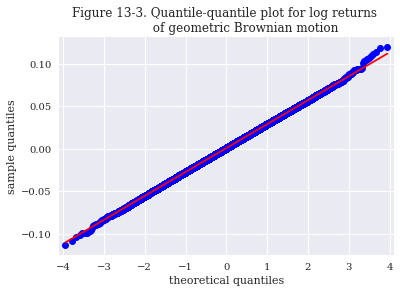

In [17]:
sm.qqplot(log_returns.flatten()[::500],line='s')
plt.title('Figure 13-3. Quantile-quantile plot for log returns \n\
          of geometric Brownian motion')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles');

P値について   
https://ja.wikipedia.org/wiki/有意 <br>
https://support.minitab.com/ja-jp/minitab/18/help-and-how-to/statistics/basic-statistics/how-to/normality-test/interpret-the-results/key-results/

In [18]:
def normality_tests(arr):
    print('データの歪度  %14.3f' % scs.skew(arr))
    print('歪度による検定のP値%14.3f' % scs.skewtest(arr)[1])
    print('データの尖度  %14.3f' % scs.kurtosis(arr))
    print('尖度による値のP値 %14.3f' % scs.kurtosistest(arr)[1])
    print('正規性検定のP値 %14.3f' % scs.normaltest(arr)[1])

In [19]:
normality_tests(log_returns.flatten())  

データの歪度           0.001
歪度による検定のP値         0.430
データの尖度           0.001
尖度による値のP値          0.541
正規性検定のP値          0.607


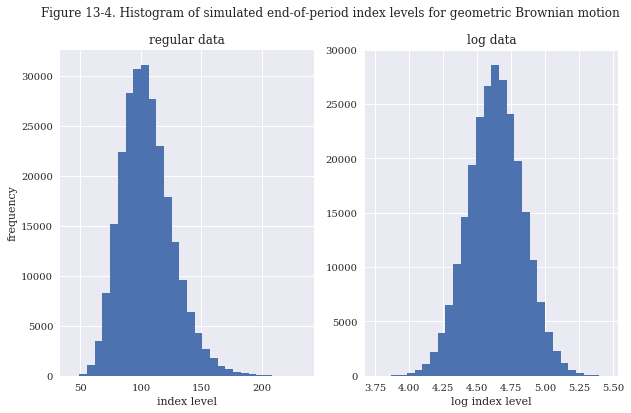

In [20]:
f,(ax1,ax2) = plt.subplots(1,2,figsize = (10,6))
ax1.hist(paths[-1],bins= 30)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')
ax1.set_title('regular data')
ax2.hist(np.log(paths[-1]),bins=30)
ax2.set_xlabel('log index level')
ax2.set_title('log data')
plt.suptitle('Figure 13-4. Histogram of simulated end-of-period index levels for geometric Brownian motion'
);

In [21]:
print_statistics(paths[-1])

           統計量               値
------------------------------
           要素数    250000.00000
           最小値        42.74870
           最大値       233.58435
            平均       105.12645
          標準偏差        21.23174
            歪度         0.61116
            尖度         0.65182


In [22]:
print_statistics(np.log(paths[-1]))

           統計量               値
------------------------------
           要素数    250000.00000
           最小値         3.75534
           最大値         5.45354
            平均         4.63517
          標準偏差         0.19998
            歪度        -0.00092
            尖度        -0.00327


In [23]:
normality_tests(np.log(paths[-1]))

データの歪度          -0.001
歪度による検定のP値         0.851
データの尖度          -0.003
尖度による値のP値          0.744
正規性検定のP値          0.931


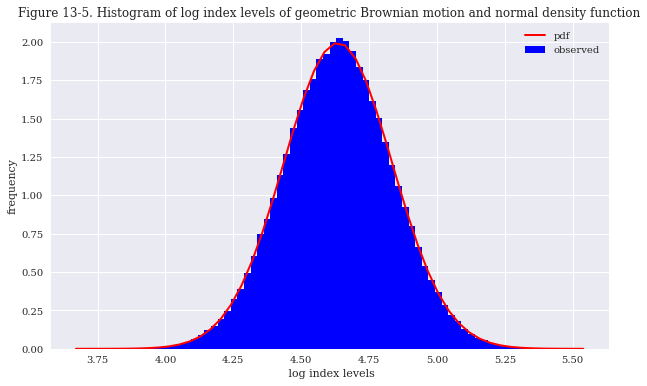

In [24]:
plt.figure(figsize=(10,6))
log_data = np.log(paths[-1])
plt.hist(log_data,bins=70,density=True,label='observed',color='b')
plt.xlabel(' log index levels')
plt.ylabel('frequency')
plt.title('Figure 13-5. Histogram of log index levels of geometric Brownian motion and normal density function')
x = np.linspace(plt.axis()[0],plt.axis()[1])
plt.plot(x,scs.norm.pdf(x,log_data.mean(),log_data.std()),'r',lw = 2.0, label = 'pdf')
plt.legend();

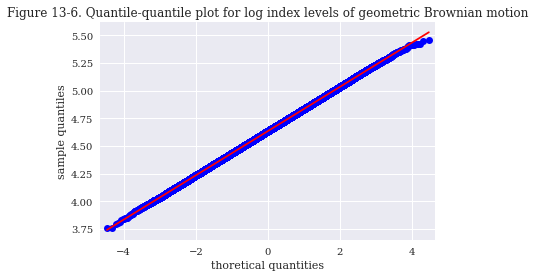

In [25]:
sm.qqplot(log_data,line = 's')
plt.xlabel('thoretical quantities')
plt.ylabel('sample quantiles')
plt.title('Figure 13-6. Quantile-quantile plot for log index levels of geometric Brownian motion');

### Real-World Data

In [26]:
import pandas as pd

In [27]:
raw = pd.read_csv('source:tr_eikon_eod_data.csv',index_col=0,parse_dates=True).dropna()

In [28]:
symbols = ['SPY','GLD','AAPL.O','MSFT.O']

SPY：アメリカを代表する大型株500銘柄を集めたETF <br>
GLD： 金相場に連動することを目指した金ETF<br>
AAPL.O：アップル<br>
MSFT.O:マイクロソフト<br>
ETFについて：https://money-bu-jpx.com/news/article000363/

In [29]:
data = raw[symbols]
data = data.dropna()

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1972 entries, 2010-01-04 to 2017-10-31
Data columns (total 4 columns):
SPY       1972 non-null float64
GLD       1972 non-null float64
AAPL.O    1972 non-null float64
MSFT.O    1972 non-null float64
dtypes: float64(4)
memory usage: 77.0 KB


In [31]:
data.head()

,SPY,GLD,AAPL.O,MSFT.O
Date,,,,
2010-01-04,113.33,109.80,30.572827,30.950
2010-01-05,113.63,109.70,30.625684,30.960
2010-01-06,113.71,111.51,30.138541,30.770
2010-01-07,114.19,110.82,30.082827,30.452
2010-01-08,114.57,111.37,30.282827,30.660


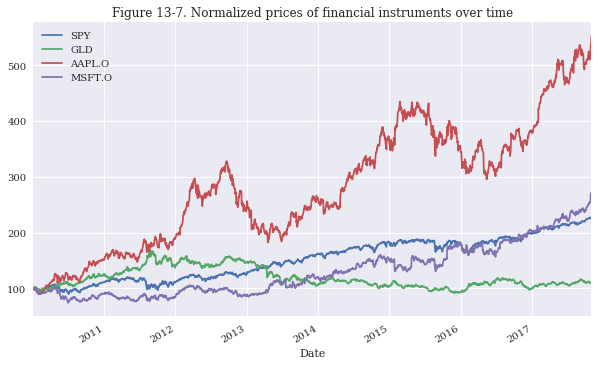

In [32]:
(data / data.iloc[0] * 100).plot(figsize=(10,6))
plt.title('Figure 13-7. Normalized prices of financial instruments over time');

In [33]:
log_returns = np.log(data / data.shift(1))
log_returns.head()

,SPY,GLD,AAPL.O,MSFT.O
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,0.002644,-0.000911,0.001727,0.000323
2010-01-06,0.000704,0.016365,-0.016034,-0.006156
2010-01-07,0.004212,-0.006207,-0.001850,-0.010389
2010-01-08,0.003322,0.004951,0.006626,0.006807


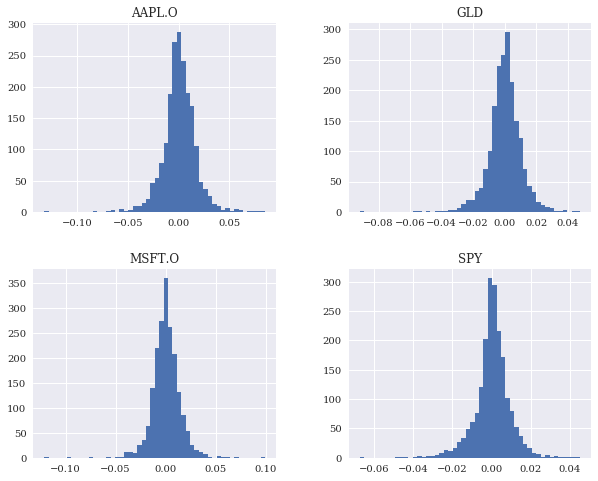

In [34]:
log_returns.hist(bins=50,figsize=(10,8));

In [35]:
for sym in symbols:
    print('Results for symbol {}'.format(sym))
    print(40 * '-')
    log_data = np.array(log_returns[sym].dropna())
    print_statistics(log_data)

Results for symbol SPY
----------------------------------------
           統計量               値
------------------------------
           要素数      1971.00000
           最小値        -0.06734
           最大値         0.04545
            平均         0.00042
          標準偏差         0.00934
            歪度        -0.46886
            尖度         4.54265
Results for symbol GLD
----------------------------------------
           統計量               値
------------------------------
           要素数      1971.00000
           最小値        -0.09191
           最大値         0.04795
            平均         0.00005
          標準偏差         0.01048
            歪度        -0.60078
            尖度         5.42113
Results for symbol AAPL.O
----------------------------------------
           統計量               値
------------------------------
           要素数      1971.00000
           最小値        -0.13187
           最大値         0.08502
            平均         0.00087
          標準偏差         0.01605
            歪度        -0.26179

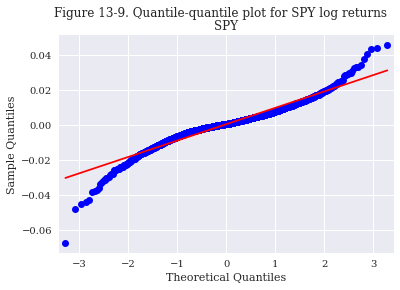

In [36]:
sm.qqplot(log_returns['SPY'].dropna(),line = 's')
plt.title('SPY')
plt.suptitle('Figure 13-9. Quantile-quantile plot for SPY log returns');

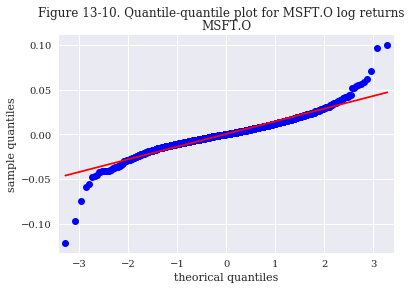

In [37]:
sm.qqplot(log_returns['MSFT.O'].dropna(),line = 's')
plt.title('MSFT.O')
plt.xlabel('theorical quantiles')
plt.ylabel('sample quantiles')
plt.suptitle('Figure 13-10. Quantile-quantile plot for MSFT.O log returns');

In [38]:
for sym in symbols:
    print('\nResults for symbol {}'.format(sym))
    print(40 * '-')
    log_data = np.array(log_returns[sym].dropna())
    normality_tests(log_data)


Results for symbol SPY
----------------------------------------
データの歪度          -0.469
歪度による検定のP値         0.000
データの尖度           4.543
尖度による値のP値          0.000
正規性検定のP値          0.000

Results for symbol GLD
----------------------------------------
データの歪度          -0.601
歪度による検定のP値         0.000
データの尖度           5.421
尖度による値のP値          0.000
正規性検定のP値          0.000

Results for symbol AAPL.O
----------------------------------------
データの歪度          -0.262
歪度による検定のP値         0.000
データの尖度           4.922
尖度による値のP値          0.000
正規性検定のP値          0.000

Results for symbol MSFT.O
----------------------------------------
データの歪度          -0.101
歪度による検定のP値         0.067
データの尖度           7.701
尖度による値のP値          0.000
正規性検定のP値          0.000
